This notebook contains the comparaison between observed and modeled data.

Notice: The modeled data only contains one point. Good to do it again but with a zone

TO DO : TAKE OUT LAST LINE: STARTING FROM RETURN PERIOD
ADD PLOT CDF curves of the data to compare their distributions

# Packages

In [1]:
import pandas as pd
import numpy as np
import os
import os.path
import seaborn as sns
import matplotlib
import geopy.distance
from matplotlib import pyplot as plt

# Functions

In [2]:
def import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA(climate_var, unit):
    # import data
    
    path_NEX_GDDP_CMIP6_EmplacementStation=os.path.join(r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file',climate_var,climate_var+'_'+unit+'_day_1970-2014_closest_point_to_NOAA','NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_'+climate_var+'_1970-2014_projectsMoz.csv')
    
    data_NEX_GDDP_CMIP6_EmplacementStation = pd.read_csv(path_NEX_GDDP_CMIP6_EmplacementStation)
    
    data_NEX_GDDP_CMIP6_EmplacementStation = add_year_month_season(data_NEX_GDDP_CMIP6_EmplacementStation,'Date')
    
    return data_NEX_GDDP_CMIP6_EmplacementStation

In [3]:
def treat_NOAA_data(daily_sum_obs_from_NOAA):
    
    daily_sum_obs_from_NOAA = add_year_month_season(daily_sum_obs_from_NOAA,'DATE')
    
    daily_sum_obs_from_NOAA = daily_sum_obs_from_NOAA[daily_sum_obs_from_NOAA['Year'].between(1970,2014)]
    
    daily_sum_obs_from_NOAA=count_na_in_df_NOAA(daily_sum_obs_from_NOAA,'PRCP')
    daily_sum_obs_from_NOAA=count_na_in_df_NOAA(daily_sum_obs_from_NOAA,'TAVG')
    daily_sum_obs_from_NOAA=count_na_in_df_NOAA(daily_sum_obs_from_NOAA,'TMAX')
    daily_sum_obs_from_NOAA=count_na_in_df_NOAA(daily_sum_obs_from_NOAA,'TMIN')
    
    return daily_sum_obs_from_NOAA

In [4]:
def count_na_in_df_NOAA(df,name_col):
    df[name_col+' MISSING']=0
    df[name_col+' MISSING'][df[name_col].isna()]=1
    return df

In [5]:
def select_station(daily_sum_obs_from_NOAA,name_station):
    daily_sum_obs_from_NOAA_name_station = daily_sum_obs_from_NOAA[daily_sum_obs_from_NOAA['NAME']==name_station]
    return daily_sum_obs_from_NOAA_name_station

In [6]:
def add_year_month_season(df,column_date):
    # add Year, month and season columns for graphs
    Year = df[[column_date]].values.reshape(len(df[[column_date]].values),)
    Month = df[[column_date]].values.reshape(len(df[[column_date]].values),)
    Season = df[[column_date]].values.reshape(len(df[[column_date]].values),)
    
    if str(Year[1]).find('-')==2:
        for i in np.arange(0,len(df[[column_date]].values)):
            Year[i]=int(Year[i][6:10])
            Month[i]=int(Month[i][3:5])
            if Month[i]>3 and Month[i]<10: # dry season in Mozambique is between April and September
                Season[i]='Dry'
            else:# humid season is between October and March
                Season[i]='Humid'
            
            Month[i]=str_month(Month[i])
            
    if str(Year[1]).find('-')==4:
        for i in np.arange(0,len(df[[column_date]].values)):
            Year[i]=int(Year[i][0:4])
            Month[i]=int(Month[i][5:7])
            if Month[i]>3 and Month[i]<10: # dry season in Mozambique is between April and September
                Season[i]='Dry'
            else:# humid season is between October and March
                Season[i]='Humid'
            
            Month[i]=str_month(Month[i])
                
    df['Year'] = Year
    df['Month'] = Month
    df['Season'] = Season
    return df

In [7]:
def str_month(int_m):
    if int_m==1:
        str_m = 'Jan'
    if int_m==2:
        str_m = 'Feb'    
    if int_m==3:
        str_m = 'Mar'
    if int_m==4:
        str_m = 'Apr'
    if int_m==5:
        str_m = 'May'
    if int_m==6:
        str_m = 'Jun'
    if int_m==7:
        str_m = 'Jul'
    if int_m==8:
        str_m = 'Aug'    
    if int_m==9:
        str_m = 'Sep'
    if int_m==10:
        str_m = 'Oct'
    if int_m==11:
        str_m = 'Nov'
    if int_m==12:
        str_m = 'Dec'
    return str_m

In [8]:
def compare_2_lines(data_1,data_2,y_name,x_name='Year',tuple_error_bar=('pi',80)):
    
    fig,ax=plt.subplots()
    plt.tight_layout() # Adjust the padding between and around subplots.

    sns.lineplot(data=pr_historic_modeled_NEXGDDPCMIP6_gorongosa.groupby(['Experiment','Model','Year'])[['Mean of the daily precipitation rate mm_per_day']].mean(),x='Year', y='Mean of the daily precipitation rate mm_per_day',hue='Model',errorbar=tuple_error_bar,ax=ax)
    sns.lineplot(data=pr_obs_gorongosa_from_gorongosa.groupby('Year')[['Mean of the daily precipitation rate mm_per_day']].mean(),x='Year', y='Mean of the daily precipitation rate mm_per_day',color='black',label='Observation from Gorongosa',errorbar=tuple_error_bar,ax=ax)
    
    # display the legend
    handles, labels=ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.38, 0.88),title='Legend')
    ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    plt.title('Modeled NEX-GDDP-CMIP6 yearly average precipitation accross time at Gorongosa,\n compared to observed yearly average temperature from gorongosa, between '+str(start_year_hist)+' and '+str(stop_year_hist))
    path_figure=r'C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\outputs\figures\Comp_hist_m_o_pr.png'
    plt.savefig(path_figure,format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written
    plt.show()

In [116]:
def compare_3_lines(title_fig,title_x_axis,clim_var,data_1,name_col_1,data_2,name_col_2,source_2,y_name,name_station,x_name='Year',tuple_error_bar=('pi',80)):
    
    fig,ax=plt.subplots()
    plt.tight_layout() # Adjust the padding between and around subplots.
    
     # count the number of missing observation data per year
    missing_data_per_year = data_2.groupby('Year')[[name_col_2+' MISSING']].sum()
    # calculate the yearly mean of the observation data
    obs_data_per_year = data_2.groupby('Year')[[name_col_2]].mean()
    # replace value of the yearly mean by Nan if the year is missing more than 1/3 of its values
    obs_data_per_year[missing_data_per_year[name_col_2+' MISSING']>122] = np.nan
    
    # determine which period we are plotting
    start_year_hist=min(obs_data_per_year.index)
    stop_year_hist=max(obs_data_per_year.index)
    
    # plot modeled data
    sns.lineplot(data=data_1.groupby(['Experiment','Model','Year'])[[name_col_1]].mean(),x='Year', y=name_col_1,hue='Model',errorbar=tuple_error_bar,ax=ax)
    
    ########## plot observed data
    obs_data_per_year=obs_data_per_year.rename(columns={name_col_2:'Observation data from '+source_2})

    for year in obs_data_per_year.index[0:len(obs_data_per_year.index)-2]:
        try:
            sns.lineplot(data=obs_data_per_year.loc[[year,year+1]],palette=['black'],ax=ax)
        except: # some data dont cover every years
            pass

    ax.set_ylabel('Yearly average '+name_col_1)
    # control labels in legend
    handles1, labels1=ax.get_legend_handles_labels() # register information from first y axis for the legend
    labels1, ids1 = np.unique(labels1, return_index=True)
    labels1=list(labels1)
    handles1 = [handles1[i] for i in ids1]
    
    # make the labels in the legend appear in the order wanted
    if labels1[len(labels1)-1]!='Observation data from '+source_2:
        str_1= labels1[len(labels1)-1]
        str_2= labels1[len(labels1)-2]

        handles1_end = handles1[len(handles1)-1]
        handles1_end_1 = handles1[len(handles1)-2]

        labels1[len(labels1)-1] = str_2
        labels1[len(labels1)-2] = str_1

        handles1[len(handles1)-2] = handles1_end
        handles1[len(handles1)-1] = handles1_end_1
    
    # is there some missing data ? if yes, we plot them. If not, we don t plot them
    if sum(missing_data_per_year[name_col_2+' MISSING'])!=0:
        # there are some missing data in observation data
        ax2 = ax.twinx()
        sns.lineplot(data=missing_data_per_year.reset_index(),x='Year',y=name_col_2+' MISSING',color='red',label='Missing observation data',ax=ax2)
        ax2.set_ylim(0, 370) # impose this scale to know how much data missing for 365 days
        ax2.set_ylabel('Number of missing data in '+source_2+' dataset')
        # set right axis on red
        ax2.yaxis.label.set_color('red')
        ax2.tick_params(axis='y', colors='red')
        ax2.spines['right'].set_color('red')
        handles2, labels2=ax2.get_legend_handles_labels() # register information from first y axis for the legend
        # display the legend
        fig.legend(handles1+handles2, labels1+labels2, loc='upper right', ncol=1, bbox_to_anchor=(1.47, 0.9),title='Legend')
        ax2.get_legend().remove() # this line permits to have a common legend for the boxplots and the line

    else:
        # there are no missing data
        plt.figtext(1.2, 0, "There are no missing data in the observation data", ha="center", fontsize=7, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
        fig.legend(handles1, labels1, loc='upper right', ncol=1, bbox_to_anchor=(1.4, 0.9),title='Legend')

    ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line


    plt.title('Modeled NEX-GDDP-CMIP6 yearly average '+clim_var+' accross time at '+name_station+',\n compared to observed yearly average '+clim_var+' from '+source_2+', between '+str(start_year_hist)+' and '+str(stop_year_hist))
    #path_figure=os.path.join(r'C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\outputs\figures',title_fig+'.png')
    #plt.savefig(path_figure,format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written
    plt.show()

In [10]:
def boxplots_(climate_var,df1,name_col1,df2,name_col2,name_station):
    
    df2['Model']='Observation NOAA'
    df2=df2.rename(columns={name_col2:name_col1})
    
    df_boxplot=pd.concat([df2,df1])

    
    fig,ax=plt.subplots()
    plt.tight_layout() # Adjust the padding between and around subplots.
    cols = ['pink' if (x =='Observation NOAA') else 'skyblue' for x in df_boxplot.Model.drop_duplicates().values]
    sns.boxplot(data=df_boxplot,x=df_boxplot.Model, y=name_col1,palette=cols,whis=[10,90],ax=ax)

    # display the legend
    #handles, labels=ax.get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.3, 1),title='Legend')
    #ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.title('Compare observation for '+climate_var+' from NOAA,with modeled data\nby NEX-GDDP-CMIP6 between 1970 to 2014 at '+name_station)

    path_figure=r'C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\outputs\figures\testBoxplotObs.png'
    plt.savefig(path_figure,format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written

    plt.show()

# Import data

## Observations data

### Precipitation and temperature NOAA

In [11]:
path = r'C:\Users\CLMRX\COWI\A248363 - Climate analysis - Documents\General\CRVA_tool\Master_thesis\Project\3 - Implementation\1 - Data\1-BC\NOAA-ClimateDataOnline\3370204.csv'
daily_sum_obs_from_NOAA = pd.read_csv(path)

In [12]:
daily_sum_obs_from_NOAA=treat_NOAA_data(daily_sum_obs_from_NOAA) # add Year Month, and count Nan, select between 1970 and 2014

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_22628\1741400354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name_col+' MISSING']=0
C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_22628\1741400354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name_col+' MISSING'][df[name_col].isna()]=1
C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_22628\1741400354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [13]:
daily_sum_obs_from_NOAA_BEIRA=select_station(daily_sum_obs_from_NOAA,'BEIRA, MZ')

In [14]:
daily_sum_obs_from_NOAA_PEMBA=select_station(daily_sum_obs_from_NOAA,'PEMBA, MZ')

In [15]:
daily_sum_obs_from_NOAA_CHIMOIO=select_station(daily_sum_obs_from_NOAA,'CHIMOIO, MZ')

### Precipitation from Gorongosa 

In [16]:
path = r'C:\Users\CLMRX\COWI\A248363 - Climate analysis - Documents\General\CRVA_tool\Master_thesis\Project\3 - Implementation\1 - Data\1-BC\DirecltyfromMoz\Precipitation_Gorongosa_reformat.csv'
pr_obs_gorongosa_from_gorongosa = pd.read_csv(path)
pr_obs_gorongosa_from_gorongosa=add_year_month_season(pr_obs_gorongosa_from_gorongosa,'time')
pr_obs_gorongosa_from_gorongosa['pr'][pr_obs_gorongosa_from_gorongosa['pr']=='s/i'] = pr_obs_gorongosa_from_gorongosa['pr'].iloc[0]
pr_obs_gorongosa_from_gorongosa['pr'] = pr_obs_gorongosa_from_gorongosa['pr'].astype(float)
pr_obs_gorongosa_from_gorongosa

time     pr  Year Month Season
0      1980-01-01    NaN  1980   Jan  Humid
1      1980-01-02    NaN  1980   Jan  Humid
2      1980-01-03    NaN  1980   Jan  Humid
3      1980-01-04    NaN  1980   Jan  Humid
4      1980-01-05    NaN  1980   Jan  Humid
...           ...    ...   ...   ...    ...
14971  2020-12-27    2.7  2020   Dec  Humid
14972  2020-12-28    0.0  2020   Dec  Humid
14973  2020-12-29    0.0  2020   Dec  Humid
14974  2020-12-30  138.4  2020   Dec  Humid
14975  2020-12-31   80.4  2020   Dec  Humid

[14976 rows x 5 columns]

## MODELED DATA

### Precipitation NEX-GDDP-CMIP6

In [143]:
# to compare historic modelisation with NOAA observation data
path_model_pr_past = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\pr\pr_mm_per_day_day_1970-2014_CLosest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_pr_1970-2014_projectsMoz.csv'
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path_model_pr_past)
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [18]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past

Name station  Experiment       Model  Latitude  Longitude        Date  \
493080    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875  01-01-1970   
493081    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875  02-01-1970   
493082    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875  03-01-1970   
493083    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875  04-01-1970   
493084    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875  05-01-1970   
...             ...         ...         ...       ...        ...         ...   
739615    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  27-12-2014   
739616    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  28-12-2014   
739617    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  29-12-2014   
739618    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  30-12-2014   
739619    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  31-12-2014   

        Mean of the daily precipitation rate mm/day  Year Month Season  
493080                                    15.221261  1970   Jan  Humid  
493081                                    15.258603  1970   Jan  Humid  
493082                                     3.232764  1970   Jan  Humid  
493083                                     0.340715  1970   Jan  Humid  
493084                                     2.544045  1970   Jan  Humid  
...                                             ...   ...   ...    ...  
739615                                     3.778890  2014   Dec  Humid  
739616                                     5.969581  2014   Dec  Humid  
739617                                     3.112424  2014   Dec  Humid  
739618                                     0.000000  2014   Dec  Humid  
739619                                     9.957744  2014   Dec  Humid  

[246540 rows x 10 columns]

In [19]:
# pas convaincue que le ligne suivante soit tres utile

In [20]:
# to compare projections with NOAA observation data
path_past_proj = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\pr\pr_mm_per_day_day_1950-2100\pr_1950-2100_projectsMoz.csv'
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj = pd.read_csv(path_past_proj)
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj=add_year_month_season(pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj,'Date')
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past_proj = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name project']=='CHIMOIO, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past_proj = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name project']=='PEMBA, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name project']=='WTP_Mutua_EIB']

In [21]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past_proj

Empty DataFrame
Columns: [Name project, Experiment, Model, Latitude, Longitude, Date, Mean of the daily precipitation rate mm_per_day, Year, Month, Season]
Index: []

In [22]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project

Name project  Experiment       Model  Latitude  Longitude  \
0        WTP_Mutua_EIB  historical  ACCESS-CM2   -19.375     34.625   
1        WTP_Mutua_EIB  historical  ACCESS-CM2   -19.375     34.625   
2        WTP_Mutua_EIB  historical  ACCESS-CM2   -19.375     34.625   
3        WTP_Mutua_EIB  historical  ACCESS-CM2   -19.375     34.625   
4        WTP_Mutua_EIB  historical  ACCESS-CM2   -19.375     34.625   
...                ...         ...         ...       ...        ...   
2240770  WTP_Mutua_EIB      ssp370     TaiESM1   -19.375     34.625   
2240771  WTP_Mutua_EIB      ssp370     TaiESM1   -19.375     34.625   
2240772  WTP_Mutua_EIB      ssp370     TaiESM1   -19.375     34.625   
2240773  WTP_Mutua_EIB      ssp370     TaiESM1   -19.375     34.625   
2240774  WTP_Mutua_EIB      ssp370     TaiESM1   -19.375     34.625   

               Date  Mean of the daily precipitation rate mm_per_day  Year  \
0        01-01-1950                                         0.657509  1950   
1        02-01-1950                                         0.442182  1950   
2        03-01-1950                                         0.031404  1950   
3        04-01-1950                                        15.071664  1950   
4        05-01-1950                                        12.865736  1950   
...             ...                                              ...   ...   
2240770  27-12-2100                                        26.071746  2100   
2240771  28-12-2100                                        18.061296  2100   
2240772  29-12-2100                                         1.507072  2100   
2240773  30-12-2100                                        15.385181  2100   
2240774  31-12-2100                                        25.303373  2100   

        Month Season  
0         Jan  Humid  
1         Jan  Humid  
2         Jan  Humid  
3         Jan  Humid  
4         Jan  Humid  
...       ...    ...  
2240770   Dec  Humid  
2240771   Dec  Humid  
2240772   Dec  Humid  
2240773   Dec  Humid  
2240774   Dec  Humid  

[2240775 rows x 10 columns]

In [23]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj

Name project  Experiment       Model  Latitude  Longitude  \
0        WTP_Mutua_EIB  historical  ACCESS-CM2   -19.375     34.625   
1        WTP_Mutua_EIB  historical  ACCESS-CM2   -19.375     34.625   
2        WTP_Mutua_EIB  historical  ACCESS-CM2   -19.375     34.625   
3        WTP_Mutua_EIB  historical  ACCESS-CM2   -19.375     34.625   
4        WTP_Mutua_EIB  historical  ACCESS-CM2   -19.375     34.625   
...                ...         ...         ...       ...        ...   
8963095      Pemba_EIB      ssp370     TaiESM1   -12.875     40.625   
8963096      Pemba_EIB      ssp370     TaiESM1   -12.875     40.625   
8963097      Pemba_EIB      ssp370     TaiESM1   -12.875     40.625   
8963098      Pemba_EIB      ssp370     TaiESM1   -12.875     40.625   
8963099      Pemba_EIB      ssp370     TaiESM1   -12.875     40.625   

               Date  Mean of the daily precipitation rate mm_per_day  Year  \
0        01-01-1950                                         0.657509  1950   
1        02-01-1950                                         0.442182  1950   
2        03-01-1950                                         0.031404  1950   
3        04-01-1950                                        15.071664  1950   
4        05-01-1950                                        12.865736  1950   
...             ...                                              ...   ...   
8963095  27-12-2100                                         0.286506  2100   
8963096  28-12-2100                                         0.050367  2100   
8963097  29-12-2100                                         0.000000  2100   
8963098  30-12-2100                                         0.581391  2100   
8963099  31-12-2100                                         6.940897  2100   

        Month Season  
0         Jan  Humid  
1         Jan  Humid  
2         Jan  Humid  
3         Jan  Humid  
4         Jan  Humid  
...       ...    ...  
8963095   Dec  Humid  
8963096   Dec  Humid  
8963097   Dec  Humid  
8963098   Dec  Humid  
8963099   Dec  Humid  

[8963100 rows x 10 columns]

### Temperature NEX-GDDP-CMIP6

In [24]:
# to compare with NOAA observation data
path_model_tas_past = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tas\tas_Celsius_day_1970-2014_closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tas_1970-2014_projectsMoz.csv'
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path_model_tas_past)
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

### Temperature maximum NEX-GDDP-CMIP6

In [25]:
# to compare with NOAA observation data
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmax\tasmax_Celsius_day_1970-2014_closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tasmax_1970-2014_projectsMoz.csv'
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path)
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

# Compare NOAA station with NEX-GDDP-CMIP6 data at the same emplacement

## Temperature

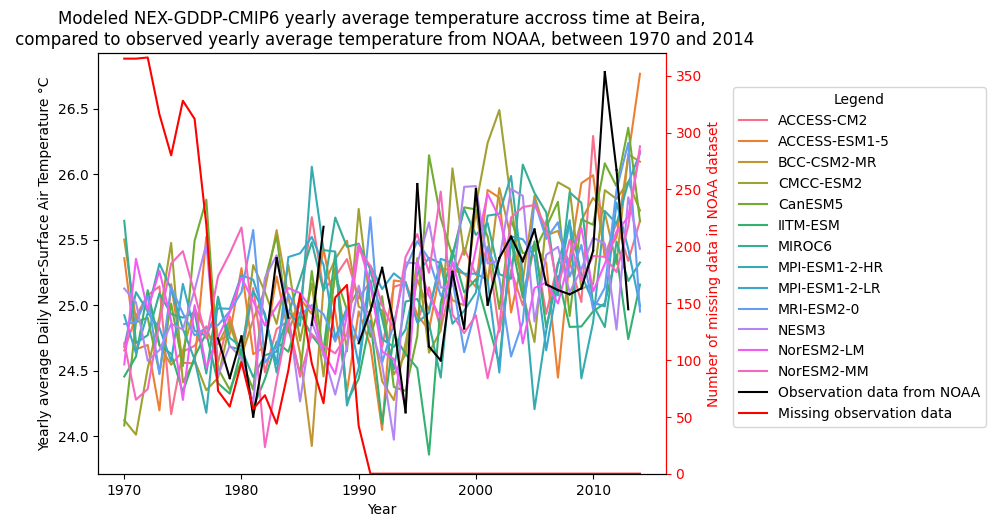

In [117]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','NOAA','Annual mean daily temperature °C','Beira')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_22628\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


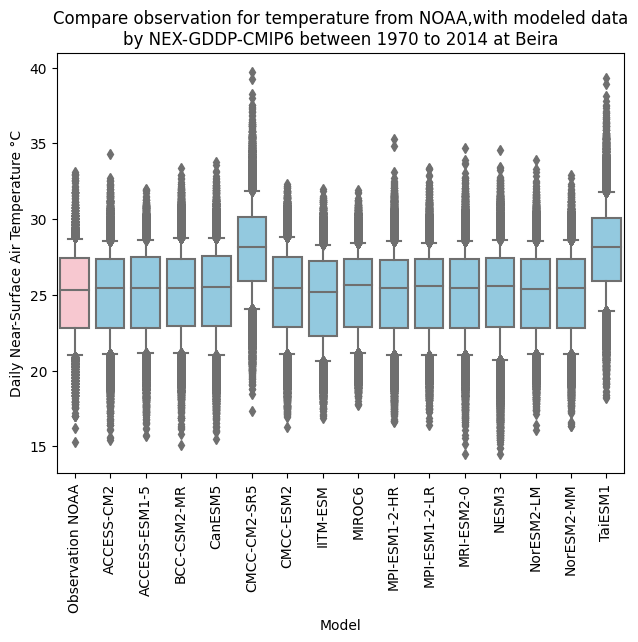

In [27]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','Beira')

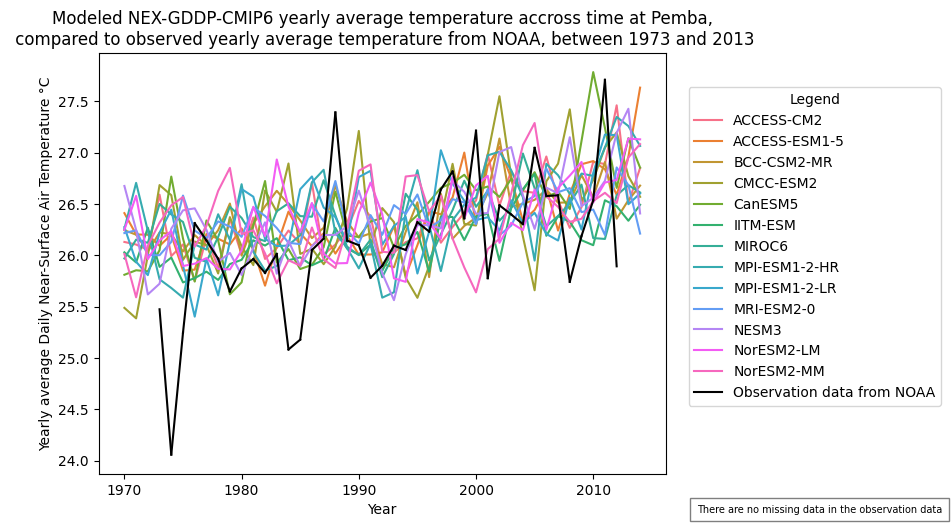

In [118]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','NOAA','Annual mean daily temperature °C','Pemba')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_22628\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


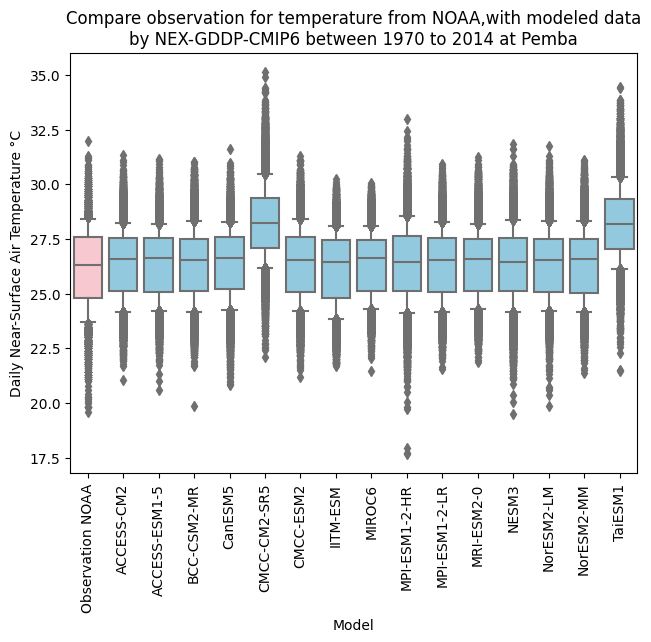

In [29]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','Pemba')

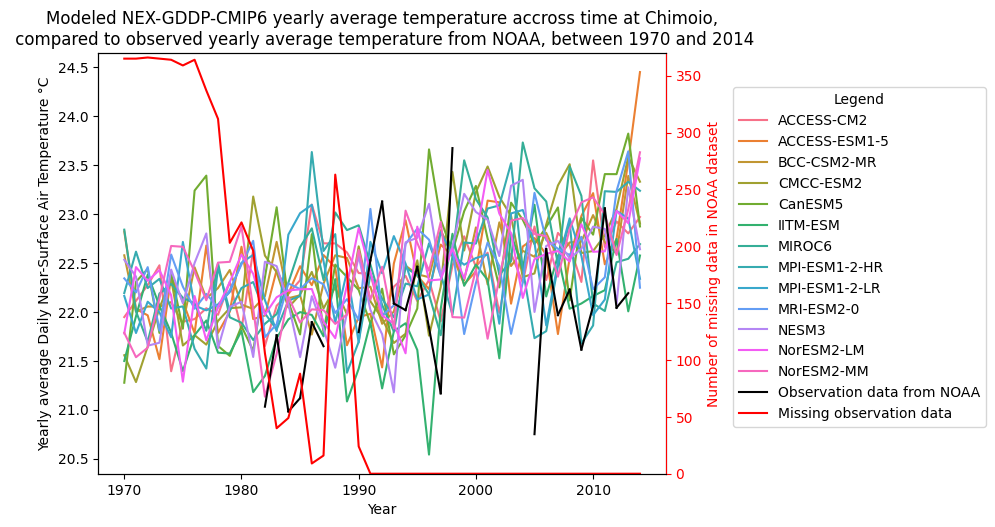

In [119]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','NOAA','Annual mean daily temperature °C','Chimoio')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_22628\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


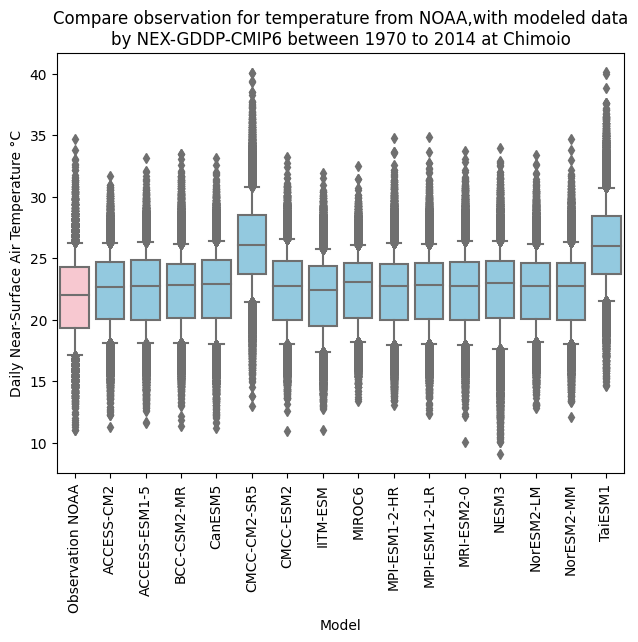

In [67]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','Chimoio')

## Maximum temperature

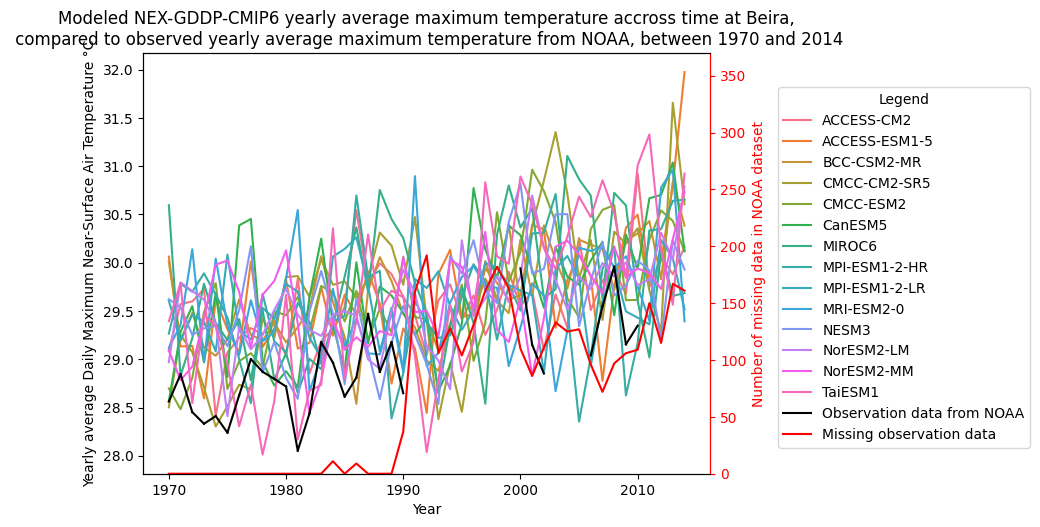

In [120]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','NOAA','Annual mean maximum daily temperature °C','Beira')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_22628\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


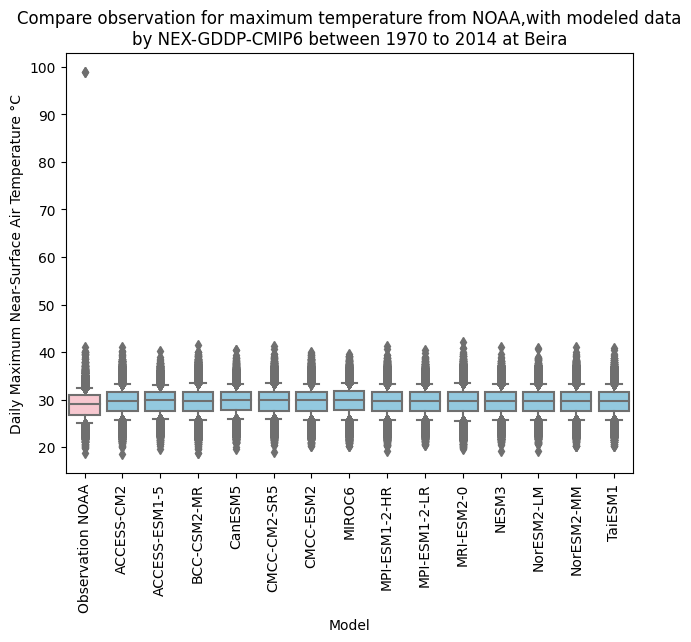

In [69]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','Beira')

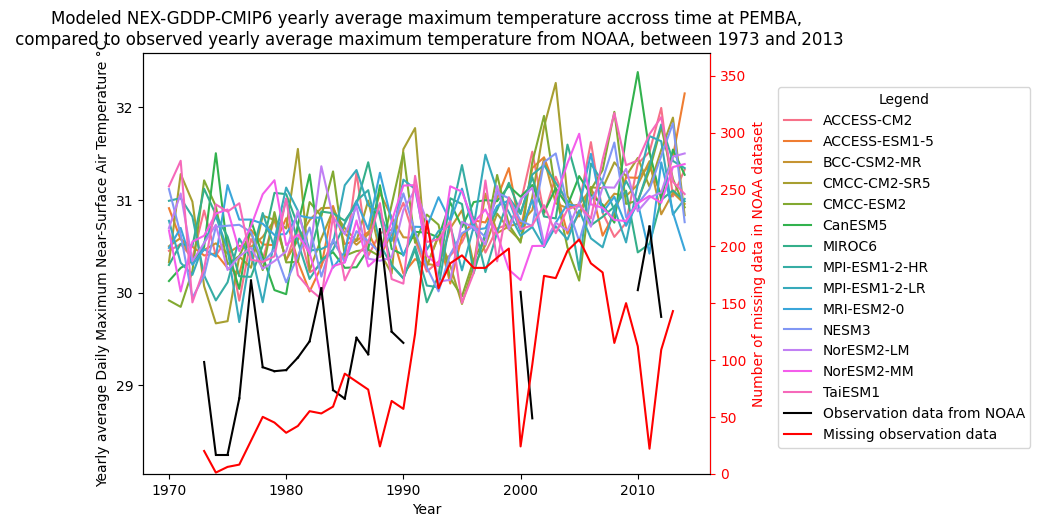

In [121]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','NOAA','Annual mean maximum daily temperature °C','PEMBA')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_22628\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


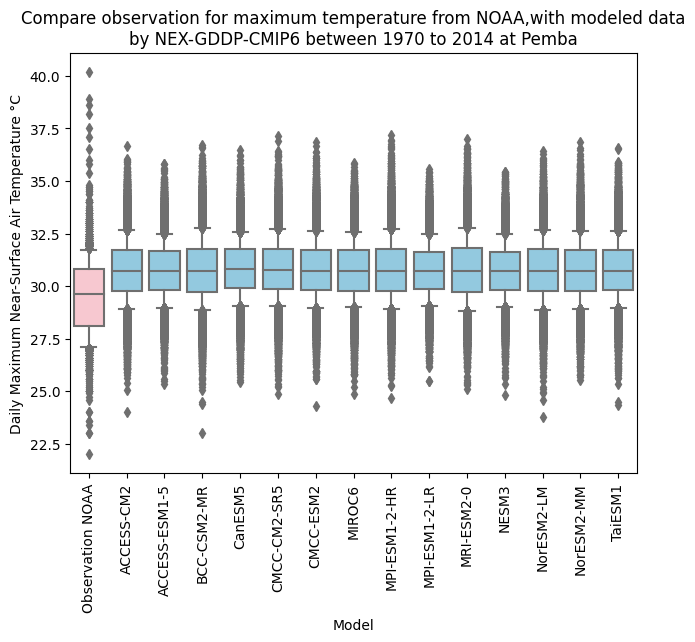

In [76]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','Pemba')

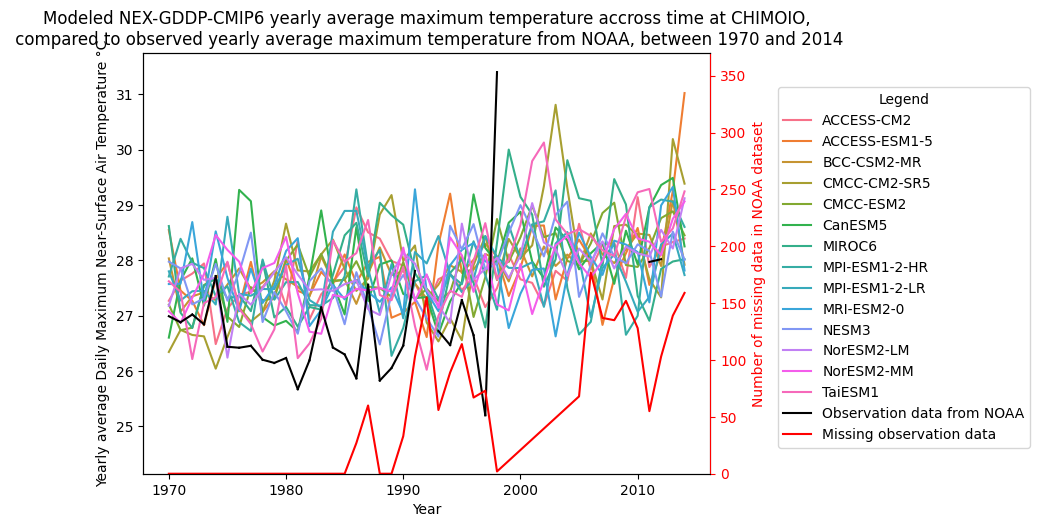

In [122]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','NOAA','Annual mean maximum daily temperature °C','CHIMOIO')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_22628\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


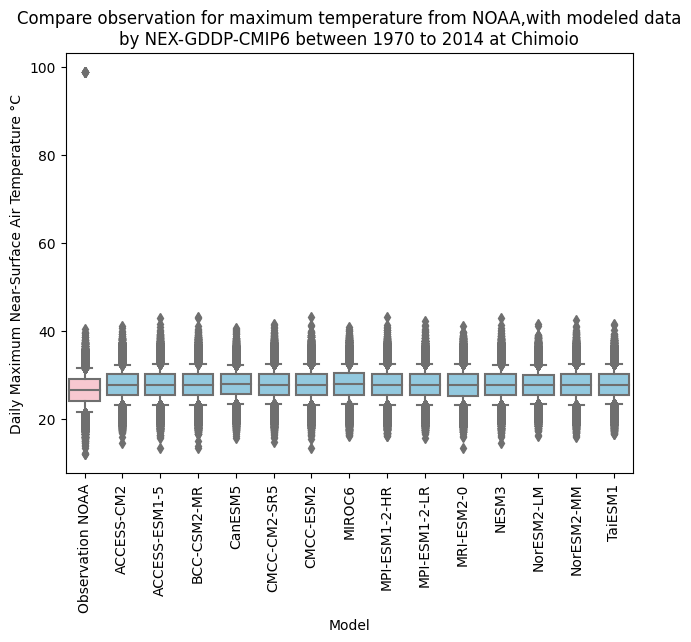

In [78]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','Chimoio')

## Precipitation

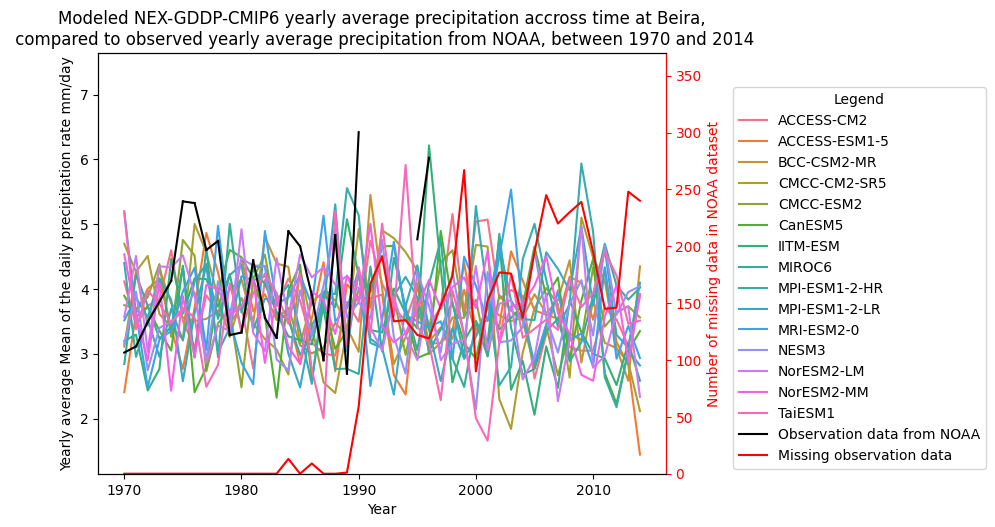

In [123]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_BEIRA,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Beira')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_22628\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


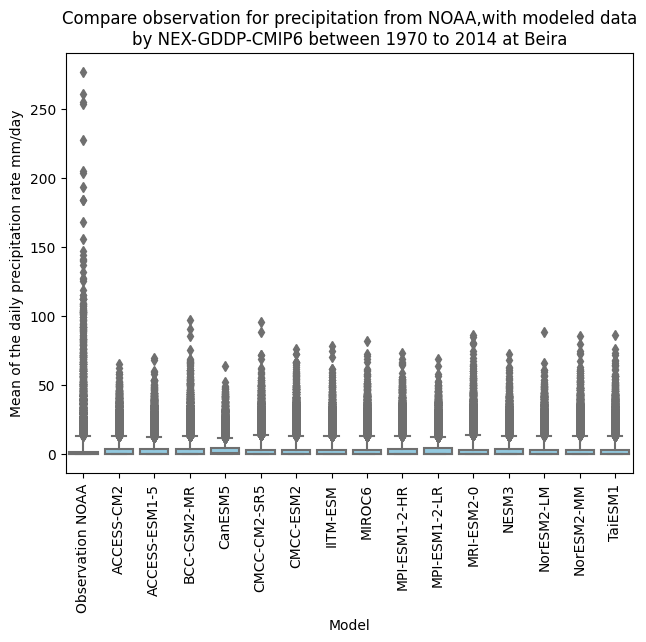

In [102]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_BEIRA,'PRCP','Beira')

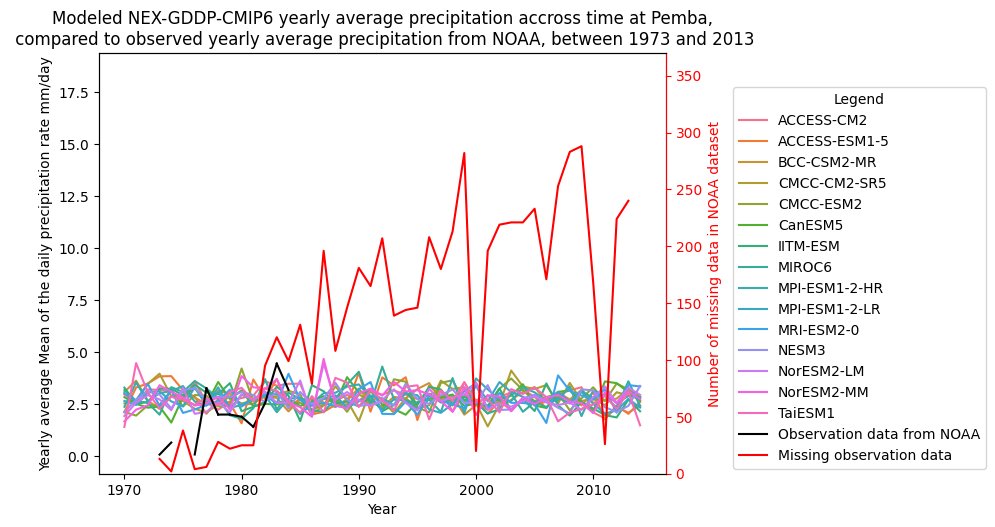

In [124]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_PEMBA,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Pemba')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_22628\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


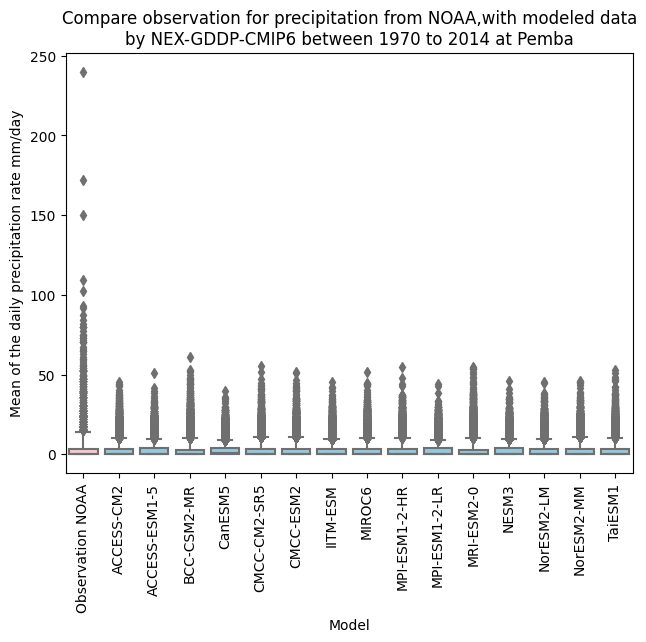

In [104]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_PEMBA,'PRCP','Pemba')

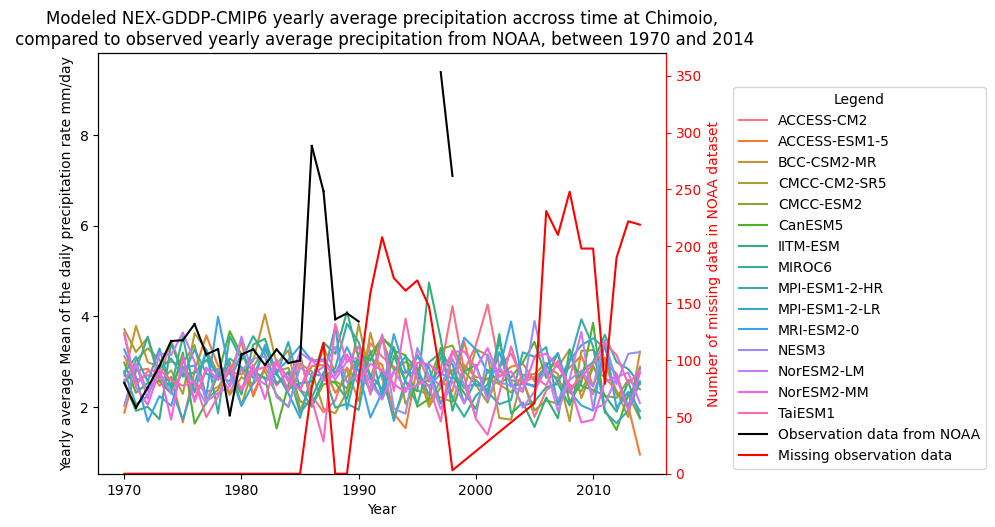

In [125]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Chimoio')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_22628\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


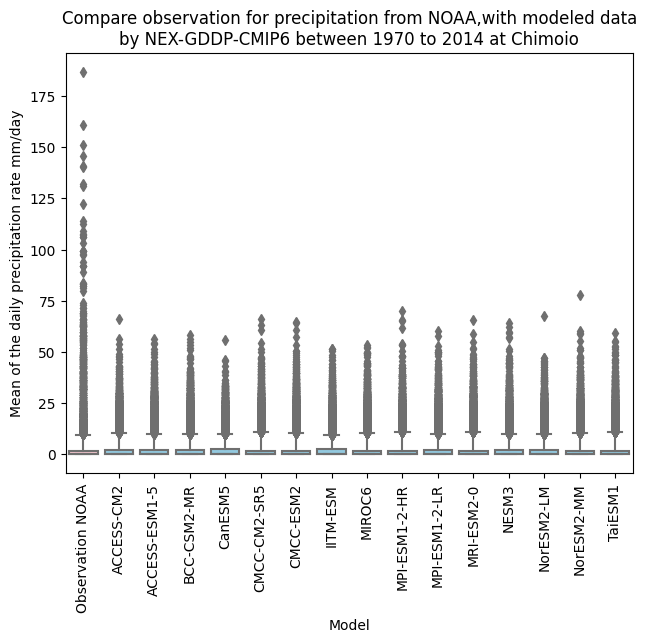

In [106]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','Chimoio')

# Which models need to be taken out ?

those graphs confirm that for precipitation and maximum temperature, no need to kill a model. But, for temperature, need to kill 'TAIESM1' and 'CMCC-CM2-SR5'

In [107]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

In [108]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']

In [109]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

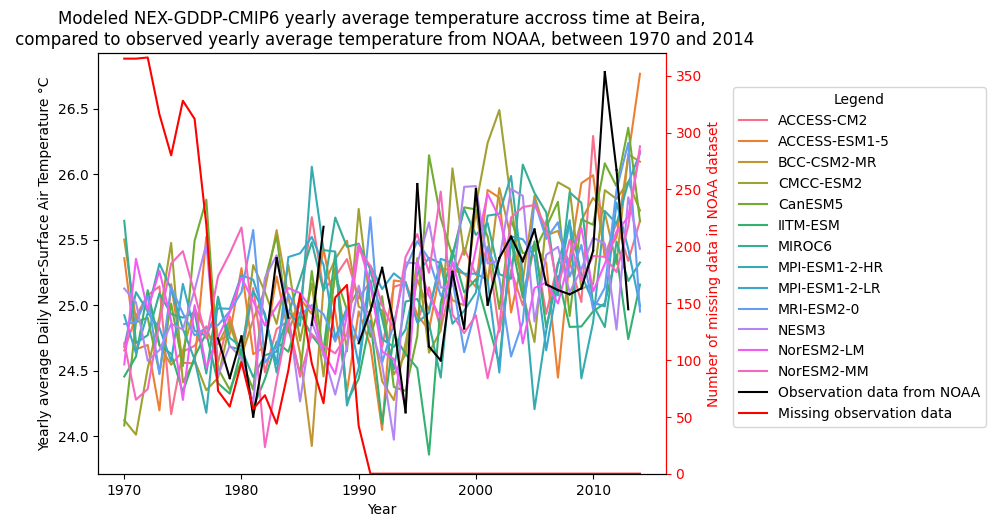

In [126]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','NOAA','Annual mean daily temperature °C','Beira')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_22628\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


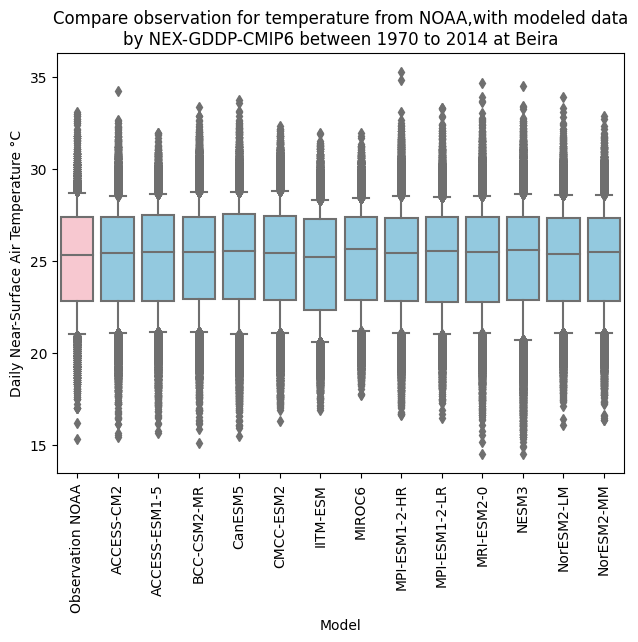

In [111]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','Beira')

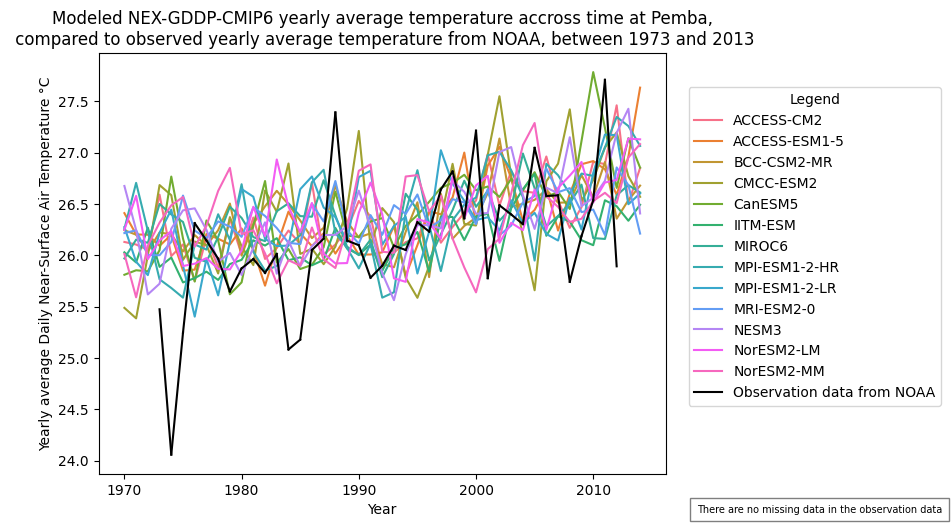

In [127]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','NOAA','Annual mean daily temperature °C','Pemba')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_22628\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


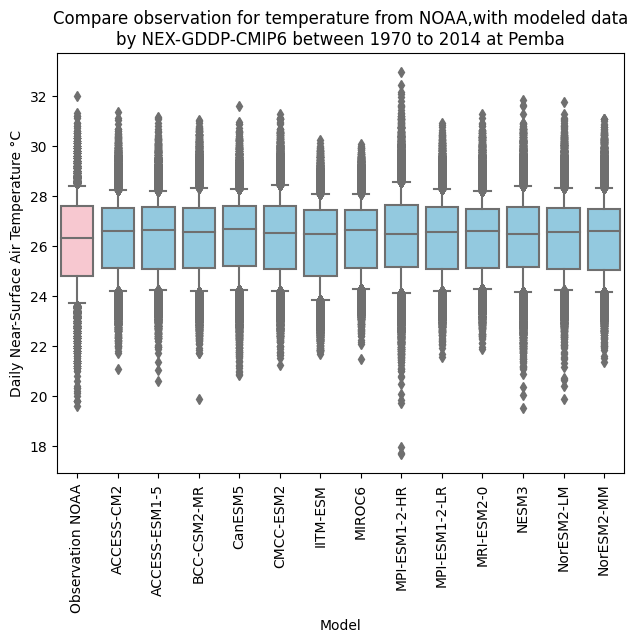

In [113]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','Pemba')

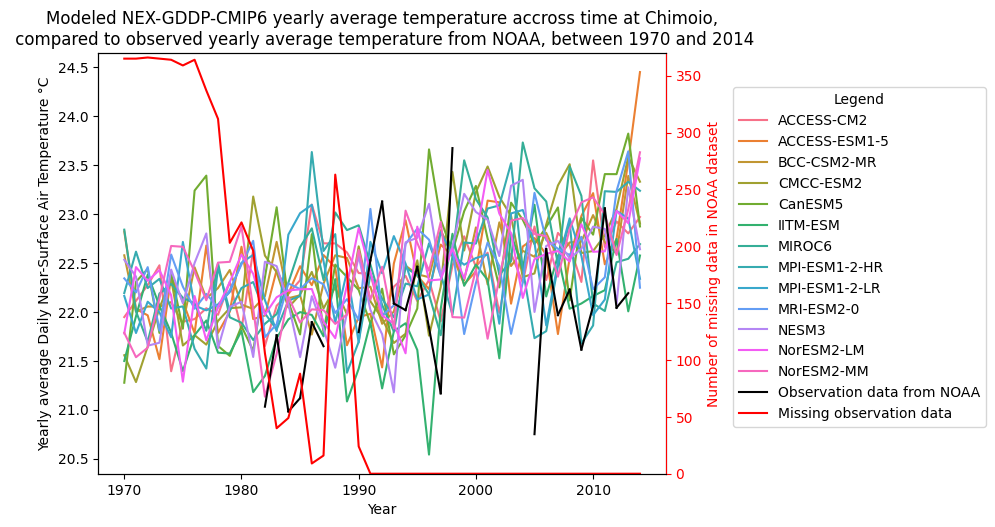

In [128]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','NOAA','Annual mean daily temperature °C','Chimoio')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_22628\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


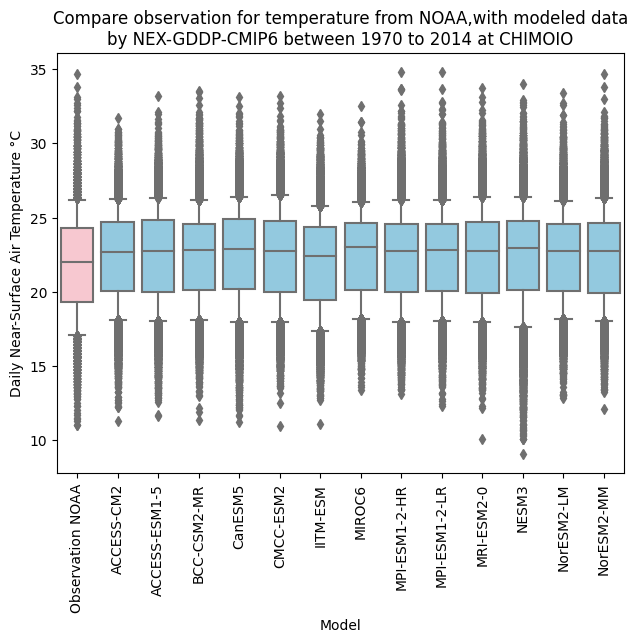

In [115]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','CHIMOIO')

In [ ]:
# Tout ce qu il y a apres a repartir ailleurs ??

# Return period

In [ ]:
#### Data from Gorongosa

In [132]:
pr_obs_gorongosa_from_gorongosa

time     pr  Year Month Season
0      1980-01-01    NaN  1980   Jan  Humid
1      1980-01-02    NaN  1980   Jan  Humid
2      1980-01-03    NaN  1980   Jan  Humid
3      1980-01-04    NaN  1980   Jan  Humid
4      1980-01-05    NaN  1980   Jan  Humid
...           ...    ...   ...   ...    ...
14971  2020-12-27    2.7  2020   Dec  Humid
14972  2020-12-28    0.0  2020   Dec  Humid
14973  2020-12-29    0.0  2020   Dec  Humid
14974  2020-12-30  138.4  2020   Dec  Humid
14975  2020-12-31   80.4  2020   Dec  Humid

[14976 rows x 5 columns]

In [133]:
Z = pr_obs_gorongosa_from_gorongosa[pr_obs_gorongosa_from_gorongosa['Year'].between(1991,2012)].groupby('Year')[['pr']].agg(np.nanmax)#.reshape(len(pr_obs_gorongosa_from_gorongosa.groupby('Year')[['pr']].max()),)
#Z = Z[~np.isnan(Z)]
(loc1,scale1)=scipy.stats.gumbel_r.fit(Z) # return the function necessary to establish the continous function
return_per_100=threshold_coresponding_to_return_period(loc1,scale1,100)
return_per_100

200

In [134]:
Z

pr
Year       
1991   84.5
1992   10.4
1993   53.2
1994   39.0
1995   20.3
1996   73.0
1997   70.0
1998   75.0
1999   72.9
2000   94.6
2001   79.7
2002   61.9
2003  110.2
2004   70.4
2005   71.0
2006   61.5
2007  167.0
2008   70.7
2009  120.0
2010   90.8
2011   82.0
2012   95.0

In [135]:
pr_obs_gorongosa_from_gorongosa['pr'].values

array([  nan,   nan,   nan, ...,   0. , 138.4,  80.4])

In [136]:
return_per_100

200

In [137]:
#### Data from NOAA, station CHIMOIO

In [138]:
daily_sum_obs_from_NOAA_CHIMOIO

STATION         NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  \
3019   MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  1970-01-01   
3020   MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  1970-01-02   
3021   MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  1970-01-03   
3022   MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  1970-01-04   
3023   MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  1970-01-05   
...            ...          ...       ...        ...        ...         ...   
14489  MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  2014-12-27   
14490  MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  2014-12-28   
14491  MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  2014-12-29   
14492  MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  2014-12-30   
14493  MZ000067295  CHIMOIO, MZ   -19.117     33.467      732.0  2014-12-31   

       PRCP PRCP_ATTRIBUTES  TAVG TAVG_ATTRIBUTES  ...  TMIN TMIN_ATTRIBUTES  \
3019    0.4             ,,Q   NaN             NaN  ...  20.7             ,,Q   
3020    0.0             ,,Q   NaN             NaN  ...  21.2             ,,Q   
3021    0.0             ,,Q   NaN             NaN  ...  20.5             ,,Q   
3022    0.0             ,,Q   NaN             NaN  ...  19.2             ,,Q   
3023    0.0             ,,Q   NaN             NaN  ...  20.2             ,,Q   
...     ...             ...   ...             ...  ...   ...             ...   
14489   NaN             NaN  24.9            H,,S  ...  21.8             ,,S   
14490   NaN             NaN  25.9            H,,S  ...  20.0             ,,S   
14491  23.1             ,,S  24.3            H,,S  ...  20.9             ,,S   
14492  45.0             ,,S  22.9            H,,S  ...  21.0             ,,S   
14493  33.0             ,,S  21.6            H,,S  ...  20.4             ,,S   

       Year Month Season PRCP MISSING TAVG MISSING  TMAX MISSING  \
3019   1970   Jan  Humid            0            1             0   
3020   1970   Jan  Humid            0            1             0   
3021   1970   Jan  Humid            0            1             0   
3022   1970   Jan  Humid            0            1             0   
3023   1970   Jan  Humid            0            1             0   
...     ...   ...    ...          ...          ...           ...   
14489  2014   Dec  Humid            1            0             1   
14490  2014   Dec  Humid            1            0             0   
14491  2014   Dec  Humid            0            0             0   
14492  2014   Dec  Humid            0            0             0   
14493  2014   Dec  Humid            0            0             1   

       TMIN MISSING             Model  
3019              0  Observation NOAA  
3020              0  Observation NOAA  
3021              0  Observation NOAA  
3022              0  Observation NOAA  
3023              0  Observation NOAA  
...             ...               ...  
14489             0  Observation NOAA  
14490             0  Observation NOAA  
14491             0  Observation NOAA  
14492             0  Observation NOAA  
14493             0  Observation NOAA  

[11475 rows x 22 columns]

In [139]:
Z = daily_sum_obs_from_NOAA_CHIMOIO[daily_sum_obs_from_NOAA_CHIMOIO['Year'].between(1991,2012)].groupby('Year')[['PRCP']].agg(np.nanmax)#.values.reshape(len(daily_sum_obs_from_NOAA_CHIMOIO.groupby('Year')[['PRCP']].max().values),)
#Z = Z[~np.isnan(Z)]
(loc1,scale1)=scipy.stats.gumbel_r.fit(Z) # return the function necessary to establish the continous function
return_per_100=threshold_coresponding_to_return_period(loc1,scale1,100)
return_per_100

213

In [140]:
Z

PRCP
Year       
1991   35.1
1992   43.9
1993  186.9
1994   37.1
1995   57.9
1996  132.1
1997   63.0
1998    7.1
2005   35.1
2006   41.9
2007  105.9
2008  141.0
2009  105.9
2010   64.0
2011   31.0
2012   83.1

In [141]:
## compare max precipitation

In [144]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past.groupby(['Experiment','Model','Year'])['Mean of the daily precipitation rate mm/day'].agg(np.nanmax).reset_index()

Experiment       Model  Year  Mean of the daily precipitation rate mm/day
0    historical  ACCESS-CM2  1970                                    32.007453
1    historical  ACCESS-CM2  1971                                    29.830081
2    historical  ACCESS-CM2  1972                                    31.503068
3    historical  ACCESS-CM2  1973                                    40.548802
4    historical  ACCESS-CM2  1974                                    37.389885
..          ...         ...   ...                                          ...
670  historical     TaiESM1  2010                                    39.551382
671  historical     TaiESM1  2011                                    38.626505
672  historical     TaiESM1  2012                                    44.429491
673  historical     TaiESM1  2013                                    27.695409
674  historical     TaiESM1  2014                                    33.509308

[675 rows x 4 columns]

In [145]:
pr_obs_gorongosa_from_gorongosa.groupby(['Year'])['pr'].agg(np.nanmax).reset_index()

Year     pr
0   1980    NaN
1   1981  180.0
2   1982  340.0
3   1983   91.2
4   1984  128.2
5   1985    NaN
6   1986    NaN
7   1987    NaN
8   1988    NaN
9   1989    NaN
10  1990    NaN
11  1991   84.5
12  1992   10.4
13  1993   53.2
14  1994   39.0
15  1995   20.3
16  1996   73.0
17  1997   70.0
18  1998   75.0
19  1999   72.9
20  2000   94.6
21  2001   79.7
22  2002   61.9
23  2003  110.2
24  2004   70.4
25  2005   71.0
26  2006   61.5
27  2007  167.0
28  2008   70.7
29  2009  120.0
30  2010   90.8
31  2011   82.0
32  2012   95.0
33  2013    NaN
34  2014  125.0
35  2015   90.5
36  2016  118.4
37  2017  200.5
38  2018  153.3
39  2019  186.3
40  2020  199.4

<Axes: xlabel='Year', ylabel='Mean of the daily precipitation rate mm/day'>

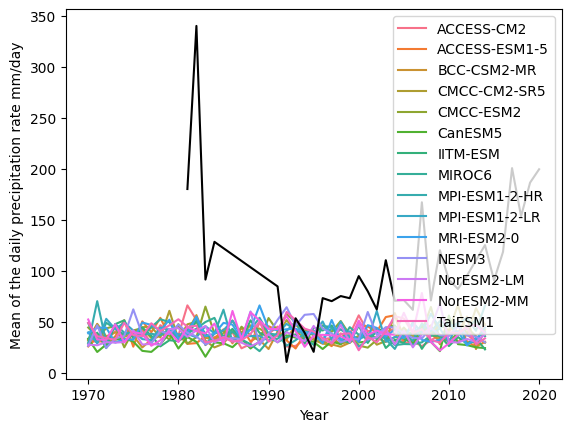

In [146]:
sns.lineplot(data=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past.groupby(['Experiment','Model','Year'])['Mean of the daily precipitation rate mm/day'].agg(np.nanmax).reset_index(),x='Year',y='Mean of the daily precipitation rate mm/day',hue='Model')
sns.lineplot(data=pr_obs_gorongosa_from_gorongosa.groupby(['Year'])['pr'].agg(np.nanmax).reset_index(),x='Year',y='pr',color='black')

In [ ]:
# conclusion graph precedent : modelisation de la pluie ne concordent pas du tout avec celles observees

In [147]:
from Graphs_functions import trends_month

ModuleNotFoundError: No module named 'Graphs_functions'

In [148]:
daily_sum_obs_from_NOAA_BEIRA

STATION       NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  \
145008  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-01   
145009  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-02   
145010  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-03   
145011  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-04   
145012  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-05   
...             ...        ...       ...        ...        ...         ...   
159722  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-27   
159723  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-28   
159724  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-29   
159725  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-30   
159726  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-31   

        PRCP PRCP_ATTRIBUTES  TAVG TAVG_ATTRIBUTES  ...  TMIN TMIN_ATTRIBUTES  \
145008   0.0             ,,Q   NaN             NaN  ...  23.8             ,,Q   
145009   0.0             ,,Q   NaN             NaN  ...  25.2             ,,Q   
145010   0.0             ,,Q   NaN             NaN  ...  26.2             ,,Q   
145011   2.5             ,,Q   NaN             NaN  ...  25.0             ,,Q   
145012  10.3             ,,Q   NaN             NaN  ...  24.6             ,,Q   
...      ...             ...   ...             ...  ...   ...             ...   
159722   NaN             NaN  30.8            H,,S  ...   NaN             NaN   
159723   NaN             NaN  30.0            H,,S  ...   NaN             NaN   
159724   NaN             NaN  28.0            H,,S  ...   NaN             NaN   
159725   NaN             NaN  25.6            H,,S  ...   NaN             NaN   
159726   4.1             ,,S  27.2            H,,S  ...  23.6             ,,S   

        Year Month Season PRCP MISSING TAVG MISSING  TMAX MISSING  \
145008  1970   Jan  Humid            0            1             0   
145009  1970   Jan  Humid            0            1             0   
145010  1970   Jan  Humid            0            1             0   
145011  1970   Jan  Humid            0            1             0   
145012  1970   Jan  Humid            0            1             0   
...      ...   ...    ...          ...          ...           ...   
159722  2014   Dec  Humid            1            0             1   
159723  2014   Dec  Humid            1            0             1   
159724  2014   Dec  Humid            1            0             1   
159725  2014   Dec  Humid            1            0             1   
159726  2014   Dec  Humid            0            0             1   

        TMIN MISSING             Model  
145008             0  Observation NOAA  
145009             0  Observation NOAA  
145010             0  Observation NOAA  
145011             0  Observation NOAA  
145012             0  Observation NOAA  
...              ...               ...  
159722             1  Observation NOAA  
159723             1  Observation NOAA  
159724             1  Observation NOAA  
159725             1  Observation NOAA  
159726             0  Observation NOAA  

[14719 rows x 22 columns]

In [ ]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA

In [ ]:
trends_month('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA,'NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_BEIRA,'NOAA','Average','Beira',temporal_resolution='Month',start_year_line=1970,stop_year_line=2014,start_year_boxplot=2020,stop_year_boxplot=2065)

In [ ]:
# KeyError: "None of [Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',\n       'Nov', 'Dec'],\n      dtype='object', name='Month')] are in the [index]"

In [155]:
temporal_resolution = 'Month'
title_column = 'Mean of the daily precipitation rate mm/day'

In [158]:
data_NEXGDDPCMIP6=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Experiment','Model',temporal_resolution,title_column]].groupby(['Experiment','Model',temporal_resolution])[[title_column]].mean().rename(columns={title_column:'New name'}).reset_index()


In [159]:
data_NEXGDDPCMIP6

Experiment       Model Month  New name
0    historical  ACCESS-CM2   Apr  3.770589
1    historical  ACCESS-CM2   Aug  1.106107
2    historical  ACCESS-CM2   Dec  6.837762
3    historical  ACCESS-CM2   Feb  8.194814
4    historical  ACCESS-CM2   Jan  7.482905
..          ...         ...   ...       ...
175  historical     TaiESM1   Mar  7.781605
176  historical     TaiESM1   May  2.024165
177  historical     TaiESM1   Nov  3.160379
178  historical     TaiESM1   Oct  1.235753
179  historical     TaiESM1   Sep  0.776636

[180 rows x 4 columns]

In [160]:
def prepare_NEX_GDDP_CMIP6(df,climate_var_longName,stats,temporal_resolution,new_name_col):
    try:
        try:
            title_column=df.filter(like=climate_var_longName, axis=1).columns[0]
        except:
            title_column=df.filter(like=climate_var_longName.capitalize(), axis=1).columns[0]
    except:
        title_column=df.filter(like=climate_var_longName.upper(), axis=1).columns[0]
    print('title_column '+title_column)
    print(df)
    if stats == 'Average':
        data_NEXGDDPCMIP6=df[['Experiment','Model',temporal_resolution,title_column]].groupby(['Experiment','Model',temporal_resolution])[[title_column]].mean().rename(columns={title_column:new_name_col}).reset_index()
        print(temporal_resolution)
        print(data_NEXGDDPCMIP6)
    if stats == 'Sum':
        data_NEXGDDPCMIP6=df[['Experiment','Model',temporal_resolution,title_column]].groupby(['Experiment','Model',temporal_resolution])[[title_column]].sum().rename(columns={title_column:new_name_col}).reset_index()
    if stats == 'Median':
        data_NEXGDDPCMIP6=df[['Experiment','Model',temporal_resolution,title_column]].groupby(['Experiment','Model',temporal_resolution])[[title_column]].median().rename(columns={title_column:new_name_col}).reset_index()
    
    if 'pr' in climate_var_longName.lower() and temporal_resolution =='Month':
        data_NEXGDDPCMIP6[new_name_col] = data_NEXGDDPCMIP6[[new_name_col]].values*30
    print(data_NEXGDDPCMIP6)
    return data_NEXGDDPCMIP6

In [162]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past

Name station  Experiment       Model  Latitude  Longitude        Date  \
493080    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875  01-01-1970   
493081    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875  02-01-1970   
493082    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875  03-01-1970   
493083    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875  04-01-1970   
493084    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875  05-01-1970   
...             ...         ...         ...       ...        ...         ...   
739615    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  27-12-2014   
739616    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  28-12-2014   
739617    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  29-12-2014   
739618    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  30-12-2014   
739619    BEIRA, MZ  historical     TaiESM1   -19.875     34.875  31-12-2014   

        Mean of the daily precipitation rate mm/day  Year Month Season  
493080                                    15.221261  1970   Jan  Humid  
493081                                    15.258603  1970   Jan  Humid  
493082                                     3.232764  1970   Jan  Humid  
493083                                     0.340715  1970   Jan  Humid  
493084                                     2.544045  1970   Jan  Humid  
...                                             ...   ...   ...    ...  
739615                                     3.778890  2014   Dec  Humid  
739616                                     5.969581  2014   Dec  Humid  
739617                                     3.112424  2014   Dec  Humid  
739618                                     0.000000  2014   Dec  Humid  
739619                                     9.957744  2014   Dec  Humid  

[246540 rows x 10 columns]

In [163]:
df_f=prepare_NEX_GDDP_CMIP6(pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past.reset_index(),'precipitation','Average','Month','New name')
df_f

title_column Mean of the daily precipitation rate mm/day
         index Name station  Experiment       Model  Latitude  Longitude  \
0       493080    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875   
1       493081    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875   
2       493082    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875   
3       493083    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875   
4       493084    BEIRA, MZ  historical  ACCESS-CM2   -19.875     34.875   
...        ...          ...         ...         ...       ...        ...   
246535  739615    BEIRA, MZ  historical     TaiESM1   -19.875     34.875   
246536  739616    BEIRA, MZ  historical     TaiESM1   -19.875     34.875   
246537  739617    BEIRA, MZ  historical     TaiESM1   -19.875     34.875   
246538  739618    BEIRA, MZ  historical     TaiESM1   -19.875     34.875   
246539  739619    BEIRA, MZ  historical     TaiESM1   -19.875     34.875   

              Date  Mean of th

Experiment       Model Month    New name
0    historical  ACCESS-CM2   Apr  113.117672
1    historical  ACCESS-CM2   Aug   33.183198
2    historical  ACCESS-CM2   Dec  205.132851
3    historical  ACCESS-CM2   Feb  245.844427
4    historical  ACCESS-CM2   Jan  224.487148
..          ...         ...   ...         ...
175  historical     TaiESM1   Mar  233.448156
176  historical     TaiESM1   May   60.724939
177  historical     TaiESM1   Nov   94.811375
178  historical     TaiESM1   Oct   37.072587
179  historical     TaiESM1   Sep   23.299089

[180 rows x 4 columns]

In [164]:
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data_boxplot=df_f.reset_index().set_index('Month').loc[month_order].reset_index()

In [165]:
data_boxplot=data_boxplot.rename(columns={'New name':'Average monthly precipitation mm/month'})

In [166]:
data_line = daily_sum_obs_from_NOAA_BEIRA[['PRCP','Month']].groupby('Month').mean().rename(columns={'PRCP':'Average monthly precipitation mm/month'}).reset_index()
data_line['Average monthly precipitation mm/month'] = data_line[['Average monthly precipitation mm/month']].values*30
data_line=data_line.reset_index().set_index('Month').loc[month_order].reset_index()   

In [167]:
daily_sum_obs_from_NOAA_BEIRA

STATION       NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  \
145008  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-01   
145009  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-02   
145010  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-03   
145011  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-04   
145012  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  1970-01-05   
...             ...        ...       ...        ...        ...         ...   
159722  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-27   
159723  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-28   
159724  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-29   
159725  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-30   
159726  MZ000067297  BEIRA, MZ     -19.8       34.9       16.0  2014-12-31   

        PRCP PRCP_ATTRIBUTES  TAVG TAVG_ATTRIBUTES  ...  TMIN TMIN_ATTRIBUTES  \
145008   0.0             ,,Q   NaN             NaN  ...  23.8             ,,Q   
145009   0.0             ,,Q   NaN             NaN  ...  25.2             ,,Q   
145010   0.0             ,,Q   NaN             NaN  ...  26.2             ,,Q   
145011   2.5             ,,Q   NaN             NaN  ...  25.0             ,,Q   
145012  10.3             ,,Q   NaN             NaN  ...  24.6             ,,Q   
...      ...             ...   ...             ...  ...   ...             ...   
159722   NaN             NaN  30.8            H,,S  ...   NaN             NaN   
159723   NaN             NaN  30.0            H,,S  ...   NaN             NaN   
159724   NaN             NaN  28.0            H,,S  ...   NaN             NaN   
159725   NaN             NaN  25.6            H,,S  ...   NaN             NaN   
159726   4.1             ,,S  27.2            H,,S  ...  23.6             ,,S   

        Year Month Season PRCP MISSING TAVG MISSING  TMAX MISSING  \
145008  1970   Jan  Humid            0            1             0   
145009  1970   Jan  Humid            0            1             0   
145010  1970   Jan  Humid            0            1             0   
145011  1970   Jan  Humid            0            1             0   
145012  1970   Jan  Humid            0            1             0   
...      ...   ...    ...          ...          ...           ...   
159722  2014   Dec  Humid            1            0             1   
159723  2014   Dec  Humid            1            0             1   
159724  2014   Dec  Humid            1            0             1   
159725  2014   Dec  Humid            1            0             1   
159726  2014   Dec  Humid            0            0             1   

        TMIN MISSING             Model  
145008             0  Observation NOAA  
145009             0  Observation NOAA  
145010             0  Observation NOAA  
145011             0  Observation NOAA  
145012             0  Observation NOAA  
...              ...               ...  
159722             1  Observation NOAA  
159723             1  Observation NOAA  
159724             1  Observation NOAA  
159725             1  Observation NOAA  
159726             0  Observation NOAA  

[14719 rows x 22 columns]

In [168]:
def boxplots_line(data_boxplot,data_line,x_axis,y_axis,source_line,title_plot,categories='Experiment'):
    fig,ax=plt.subplots()
    sns.boxplot(data=data_boxplot, x=x_axis, y=y_axis, hue=categories,ax=ax)
    ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    sns.lineplot(data=data_line,x=x_axis, y=y_axis,ax=ax,label=source_line)
    
    # display the common legend for the line and boxplots
    handles, labels=ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.2, 0.5),title='Legend')
    ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    plt.title(title_plot)
    path_figure=os.path.join(r'C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\outputs\figures','trend_month.png')
    plt.savefig(path_figure,format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written

    plt.show()

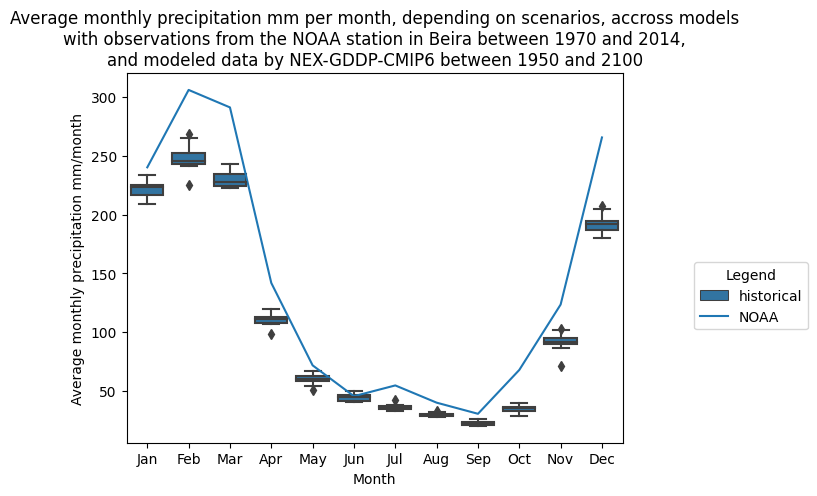

In [169]:
boxplots_line(data_boxplot,data_line,'Month','Average monthly precipitation mm/month','NOAA','Average monthly precipitation mm per month, depending on scenarios, accross models\nwith observations from the NOAA station in Beira between 1970 and 2014,\nand modeled data by NEX-GDDP-CMIP6 between 1950 and 2100',categories='Experiment')

Text(0.5, 1.0, 'Cumulative distribution function of the daily average temperature,\nNOAA observation data between 1970 to 2014 at Beira, MZ')

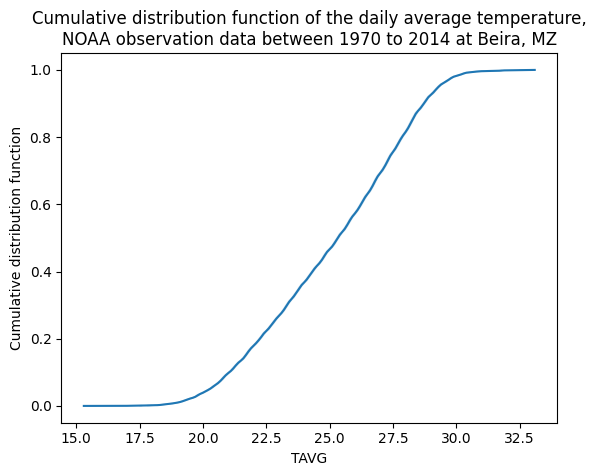

In [170]:
df_obs = daily_sum_obs_from_NOAA_BEIRA[['DATE','TAVG']].sort_values('TAVG',na_position='first').dropna()
df_obs['CDF'] = np.arange(len(df_obs)) / float(len(df_obs))

fig,ax=plt.subplots()
sns.lineplot(data=df_obs,x='TAVG',y='CDF',errorbar =('pi',80))
plt.ylabel('Cumulative distribution function')
plt.title('Cumulative distribution function of the daily average temperature,\nNOAA observation data between 1970 to 2014 at Beira, MZ')


Text(0.5, 1.0, 'Cumulative distribution function of the daily maximum temperature,\nNOAA observation data between 1970 to 2014 at Beira, MZ')

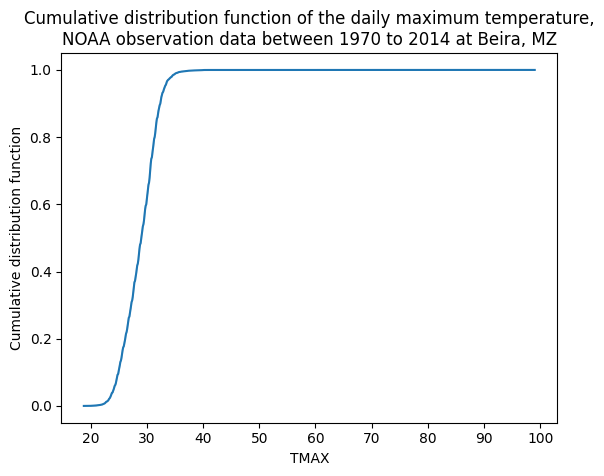

In [172]:
df_obs = daily_sum_obs_from_NOAA_BEIRA[['DATE','TMAX']].sort_values('TMAX',na_position='first').dropna()
df_obs['CDF'] = np.arange(len(df_obs)) / float(len(df_obs))

fig,ax=plt.subplots()
sns.lineplot(data=df_obs,x='TMAX',y='CDF',errorbar =('pi',80))
plt.ylabel('Cumulative distribution function')
plt.title('Cumulative distribution function of the daily maximum temperature,\nNOAA observation data between 1970 to 2014 at Beira, MZ')


In [ ]:
min(daily_sum_obs_from_NOAA_BEIRA[['TMAX']].values)

In [ ]:
daily_sum_obs_from_NOAA_BEIRA_plot[['TMAX']].nlargest(10,'TMAX')

In [ ]:
daily_sum_obs_from_NOAA_BEIRA_plot=daily_sum_obs_from_NOAA_BEIRA.drop(149716)
daily_sum_obs_from_NOAA_BEIRA_plot=daily_sum_obs_from_NOAA_BEIRA_plot.drop(152248)

In [ ]:
# 100 year event for Beira

In [ ]:
Z = daily_sum_obs_from_NOAA_BEIRA[daily_sum_obs_from_NOAA_BEIRA['Year'].between(1991,2012)].groupby('Year')[['PRCP']].agg(np.nanmax)#.values.reshape(len(daily_sum_obs_from_NOAA_CHIMOIO.groupby('Year')[['PRCP']].max().values),)
#Z = Z[~np.isnan(Z)]
(loc1,scale1)=scipy.stats.gumbel_r.fit(Z) # return the function necessary to establish the continous function
return_per_100=threshold_coresponding_to_return_period(loc1,scale1,100)
return_per_100